# LAB3

In [1]:
import numpy as np 
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import math

In [ ]:
def filtration(img, filter):

    img_h, img_w = img.shape
    filter_h, filter_w = filter.shape

    pad_h = filter_h // 2
    pad_w = filter_w // 2

    padded_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    result = np.zeros_like(img)

    for i in range(img_h):
        for j in range(img_w):
           
            region = padded_img[i:i + filter_h, j:j + filter_w]
            
            result[i, j] = np.sum(region * filter)

    return result

In [3]:
img = cv2.imread("images/fish.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

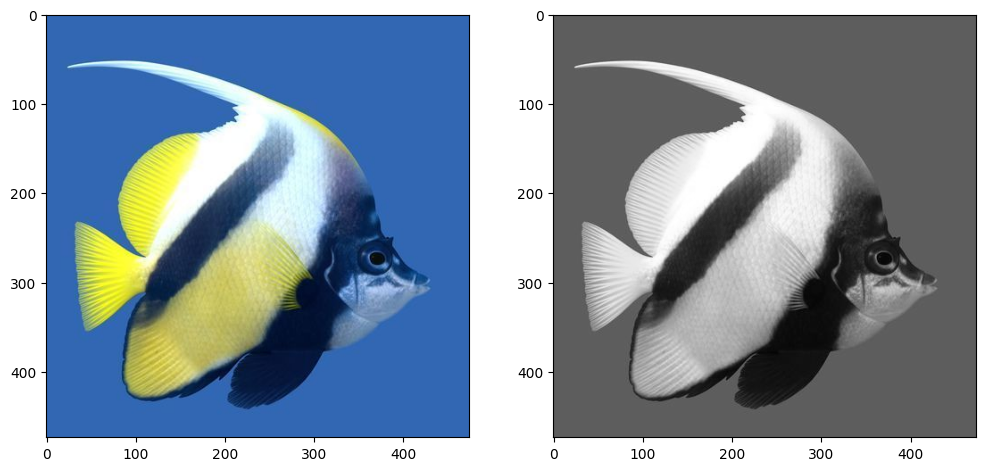

In [4]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(gray_img,  cmap="gray")

## 1. Зсув зображення на 10 пiкселiв вправо та 20 вниз.

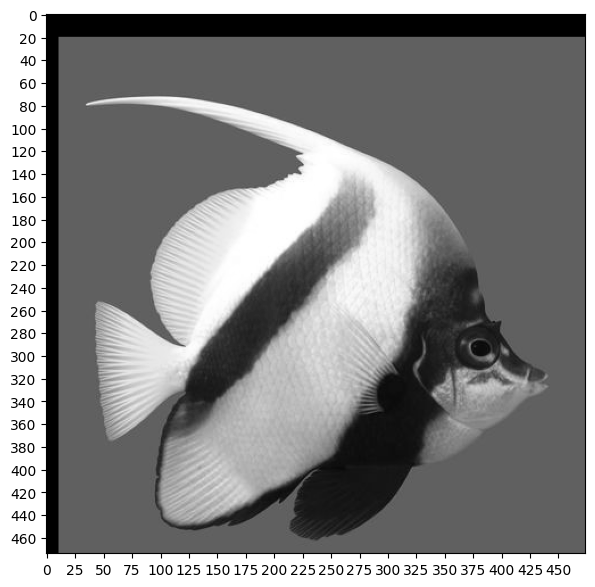

In [5]:
filter_1 = np.zeros((40, 40))
filter_1[0][9] = 1

output1 = filtration(gray_img, filter_1)

plt.figure(figsize=(7, 7))
plt.imshow(output1, cmap="gray")
plt.locator_params(axis='x', nbins=20)  
plt.locator_params(axis='y', nbins=45)
plt.show()

## 2. Iнверсiя

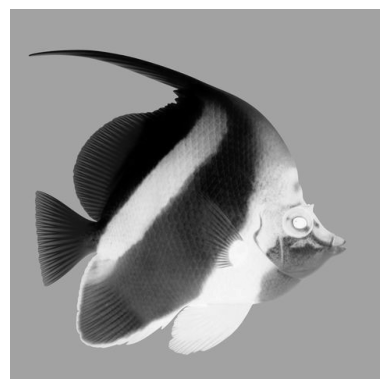

In [6]:
filter_2 = np.zeros((39, 39))
filter_2[19][19] = -1

output2 = filtration(gray_img, filter_2)

plt.imshow(output2, cmap="gray")
plt.axis('off')
plt.show()

## 3. Згладжування по Гауссу 
### 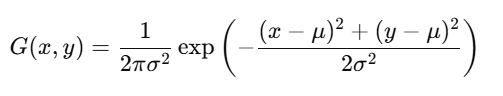

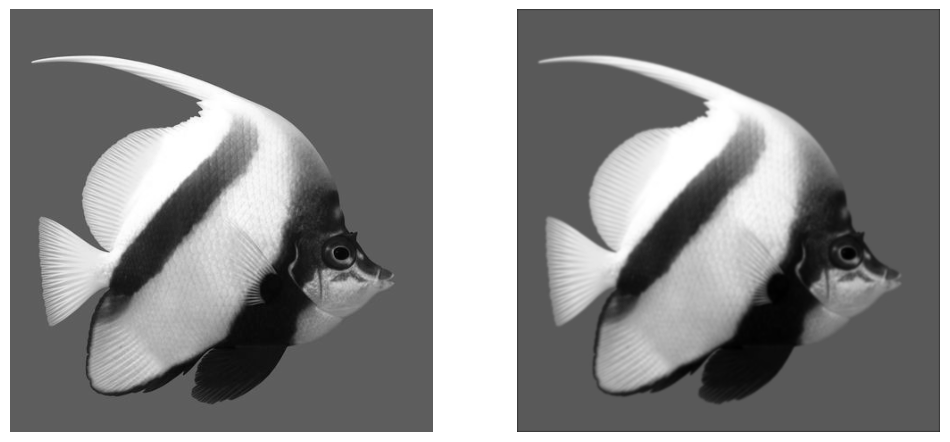

In [ ]:

size = 11
sigma = 1

filter_3 = np.zeros((size, size), dtype=np.float64)

for i in range(size):
    for j in range(size):
        filter_3[i, j] = (1 / (2 * math.pi * sigma ** 2)) * np.exp(-((i - (size // 2)) ** 2 + (j - (size // 2)) ** 2) / (2 * sigma ** 2))

filter_3 /= np.sum(filter_3)
output3 = filtration(gray_img, filter_3)

plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(gray_img,  cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output3,  cmap="gray")
plt.axis('off')

plt.show()

## 4. Розмиття "рух по дiагоналi"

In [8]:
size = 10
filter_4 = np.zeros((size, size))

for i in range(size):
    filter_4[i, i] = 1 / size

print(filter_4)

[[0.1 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.1 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.1 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.1 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1]]


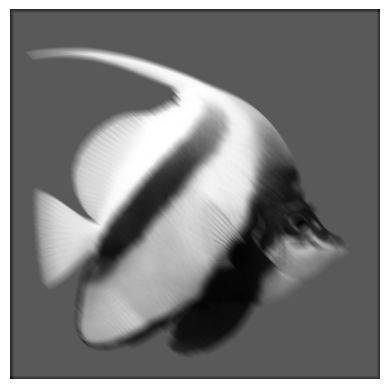

In [9]:
output4 = filtration(gray_img, filter_4)
plt.imshow(output4, cmap="gray")
plt.axis('off')
plt.show()

## 5. Пiдвищення рiзкостi.

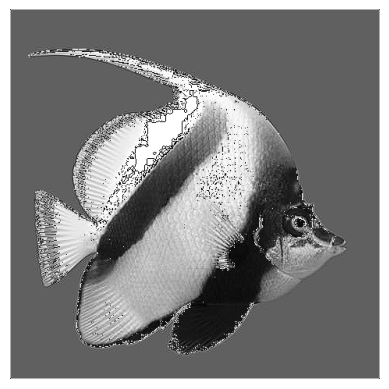

In [ ]:
filter_5 = np.array([[0, -1, 0], 
                     [-1, 5, -1], 
                     [0, -1, 0]])

output5 = filtration(gray_img, filter_5)
plt.imshow(output5, cmap="gray")
plt.axis('off')
plt.show()


In [20]:
np.min(output5), np.max(output5)

(np.uint8(0), np.uint8(255))

## 6. Фiльтр Собеля 

(np.float64(-0.5), np.float64(735.5), np.float64(1103.5), np.float64(-0.5))

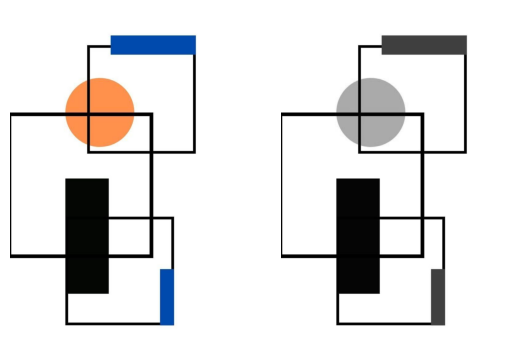

In [11]:
img1 = cv2.imread("images/figure2.jpg")
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img1,  cmap="gray")
plt.axis('off')

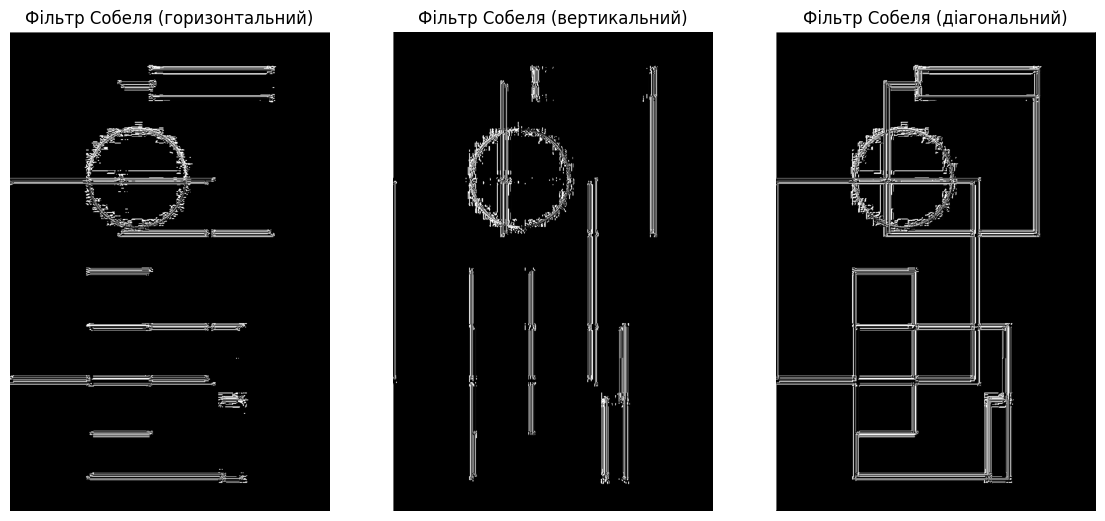

In [12]:
filter_6_1 = np.array([[-1, -2, -1], 
                       [0, 0, 0], 
                       [1, 2, 1]])

filter_6_2 = np.array([[-1, 0, 1],
                       [-2, 0, 2], 
                       [-1, 0, 1]])

filter_6_3 = np.array([[-2, -1, 0],
                       [-1, 0, 1], 
                       [0, 1, 2]])

output6_1 = filtration(gray_img1, filter_6_1)
output6_2 = filtration(gray_img1, filter_6_2)
output6_3 = filtration(gray_img1, filter_6_3)

plt.figure(figsize=(14, 8))
plt.subplot(1, 3, 1)
plt.imshow(output6_1,  cmap="gray")
plt.title("Фiльтр Собеля (горизонтальний)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(output6_2,  cmap="gray")
plt.title("Фiльтр Собеля (вертикальний)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(output6_3, cmap="gray")
plt.title("Фiльтр Собеля (діагональний)")
plt.axis('off')

plt.show()

## 7. Фiльтр границi

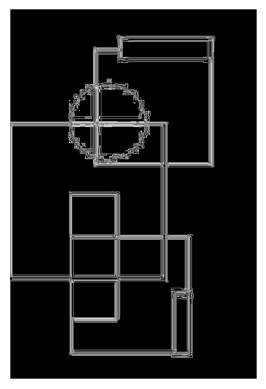

In [13]:
filter_7 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

output7 = filtration(gray_img1, filter_7)
plt.imshow(output7, cmap="gray")
plt.axis('off')
plt.show()

## 8. Який-небудь цiкавий фiльтр 

In [14]:
filter_8 = np.array([[1, 1, 1], [2, 2, 2], [-1, -1, -1]])
print(filter_8)


[[ 1  1  1]
 [ 2  2  2]
 [-1 -1 -1]]


In [15]:
img2 = cv2.imread("images/figure.jpg")
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

(np.float64(-0.5), np.float64(562.5), np.float64(749.5), np.float64(-0.5))

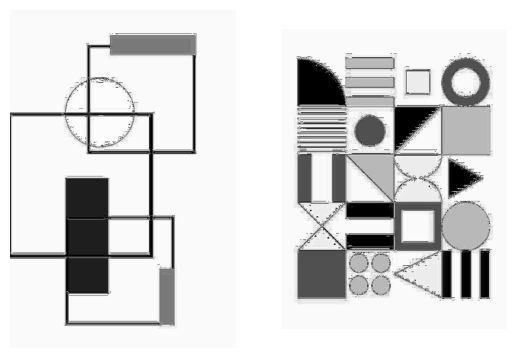

In [16]:
output8_1 = filtration(gray_img1, filter_8)
output8_2 = filtration(gray_img2, filter_8)

plt.subplot(1, 2, 1)
plt.imshow(output8_1, cmap="gray")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output8_2, cmap="gray")
plt.axis('off')
